# Research Data for paper "How accurate are developers' emotions inferred from social media?"

## GENERAL - CHARTS

This Notebook file contains the source codes for the statistics over the dataset used in the paper "How accurate are developers' emotions inferred from social media?".

Due to participants' data privacy, we do not present any identifiable data here, such as participants' Twitter account or text publication.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.metrics as me
from collections import Counter
import copy
from sklearn.metrics import classification_report
from scipy.stats import norm, skew

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
# COMMON VARIABLES

alg_to_analyze = [
    'vader_sentiment_analysis_score',
    'vader_sentiment_analysis_polarity'
]

tpd_columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

## DATA READING

The JSON file 'alldata.json' contains the data used in this Notebook.

In [3]:
data = pd.read_json(r'https://raw.githubusercontent.com/leosilva/jss_2021_paper/master/alldata.json')

In [5]:
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
participant_id,1,2,3,None,4,5,6,None,7,8,None,9,10,11,12,13,14,15,16
created_at,2009-03-11 12:51:34,2008-06-17 14:52:40,2017-11-05 01:21:27,2009-09-27 00:22:22,2015-08-18 09:44:42,2007-12-02 18:59:26,2018-08-28 15:53:30,2012-03-19 11:54:15,2008-01-09 20:56:00,2009-08-02 15:11:05,2008-12-21 15:24:53,2010-07-30 18:14:56,2009-01-04 16:46:32,2013-10-30 12:34:50,2018-08-07 07:54:08,2010-01-29 13:40:07,2018-09-15 09:25:06,2009-08-28 21:11:31,2010-03-04 19:05:54
tweets,"[[102566, 2021-03-31T19:13:28, 26, -0.45880000...","[[108111, 2021-03-31T20:30:21, 27, -0.0258, ne...","[[113189, 2021-03-31T21:52:37, 28, 0.0, neu, n...","[[119977, 2021-03-31T21:31:58, 29, 0.5859, pos...","[[123576, 2021-03-31T09:36:24, 30, 0.610300000...","[[126748, 2021-03-31T22:18:50, 31, 0.248100000...","[[139947, 2021-03-31T23:34:40, 32, 0.198400000...","[[142861, 2021-03-31T23:12:55, 33, -0.34, neg,...","[[154027, 2021-03-31T23:30:22, 34, 0.7088, pos...","[[157011, 2021-03-31T19:13:22, 35, -0.40190000...","[[160069, 2021-03-30T12:47:49, 36, 0.1027, pos...","[[163576, 2021-03-31T18:48:36, 37, 0.296, pos,...","[[171161, 2021-03-31T23:11:12, 38, 0.7096, pos...","[[176593, 2021-03-31T16:06:49, 39, -0.37160000...","[[179579, 2021-03-31T18:09:10, 40, 0.0, neu, n...","[[184846, 2021-03-31T17:53:40, 41, -0.2023, ne...","[[191406, 2021-03-31T07:12:32, 42, 0.0, neu, n...","[[196544, 2021-03-31T23:47:03, 43, 0.6369, pos...","[[224369, 2021-03-31T23:57:17, 44, -0.70890000..."
bigfive,"[[4, 37, 43, 36, 24, 26, 26]]","[[3, 41, 43, 34, 22, 23, 27]]","[[2, 43, 46, 31, 24, 15, 28]]",[],"[[9, 17, 33, 33, 22, 39, 30]]","[[1, 22, 33, 31, 20, 8, 31]]","[[14, 39, 49, 39, 28, 15, 32]]",[],"[[6, 35, 35, 32, 26, 16, 34]]","[[5, 29, 45, 34, 35, 29, 35]]",[],"[[7, 40, 46, 38, 22, 21, 37]]","[[8, 32, 46, 19, 18, 28, 38]]","[[10, 31, 36, 25, 33, 21, 39]]","[[11, 36, 45, 31, 31, 19, 40]]","[[12, 29, 41, 28, 22, 28, 41]]","[[13, 29, 43, 27, 23, 35, 42]]","[[15, 29, 45, 36, 27, 32, 43]]","[[16, 30, 35, 24, 20, 32, 44]]"


In [12]:
# data_psi = pd.read_csv(r'/Users/leosilva/Documents/Estudo/Doutorado/Coimbra/2019-2020/Disciplinas/Thesis/analises_psicologos/tweets_consolidados.csv')
data_psi = pd.read_csv(r'https://raw.githubusercontent.com/leosilva/jss_2021_paper/master/analyzed_tweets_dataset1_first_round.csv')
data_psi.columns = ['id',
                    'Classificacao_PSI1_5_cat',
                    'Classificacao_PSI2_5_cat',
                    'Classificacao_PSI3_5_cat']
data_psi.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat
0,102600,Negativo Fraco,Positivo Fraco,Neutro
1,102895,Negativo Fraco,Negativo Forte,Negativo Forte
2,103085,Negativo Forte,Negativo Forte,Negativo Forte
3,103092,Positivo Fraco,Positivo Fraco,Positivo Fraco
4,103200,Positivo Fraco,Negativo Fraco,Negativo Forte


In [13]:
# data_psi_restantes = pd.read_csv(r'/Users/leosilva/Documents/Estudo/Doutorado/Coimbra/2019-2020/Disciplinas/Thesis/analises_psicologos/tweets_restantes_consolidados.csv')
data_psi_restantes = pd.read_csv(r'https://raw.githubusercontent.com/leosilva/jss_2021_paper/master/analyzed_tweets_dataset2_first_round.csv')
data_psi_restantes.columns = ['id',
                    'Classificacao_PSI1_5_cat',
                    'Classificacao_PSI2_5_cat',
                    'Classificacao_PSI3_5_cat']
data_psi_restantes.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat
0,140009,Negativo Fraco,Negativo Fraco,Positivo Fraco
1,140363,Neutro,Neutro,Neutro
2,140622,Positivo Fraco,Positivo Fraco,Positivo Fraco
3,140710,Neutro,Neutro,Positivo Fraco
4,141162,Neutro,Positivo Fraco,Positivo Fraco


In [14]:
# data_psi_divergentes_resolvidos = pd.read_csv(r'/Users/leosilva/Documents/Estudo/Doutorado/Coimbra/2019-2020/Disciplinas/Thesis/analises_psicologos/tweets_divergentes_resultado.csv')
data_psi_divergentes_resolvidos = pd.read_csv(r'https://raw.githubusercontent.com/leosilva/jss_2021_paper/master/analyzed_tweets_second_round.csv')
data_psi_divergentes_resolvidos.columns = ['id', 'Classificacao_PSI_5_cat']
data_psi_divergentes_resolvidos.head()

,id,Classificacao_PSI_5_cat
0,102600,Neutro
1,103241,Negativo Fraco
2,103875,Positivo Fraco
3,104229,Neutro
4,104337,Negativo Fraco


## Dataframe preparation - Psychologists answers

In [15]:
def reduce_polatiries_to_3_categories(df, column):
    conditions = [
        (df['{}_5_cat'.format(column)] == 'Positivo Fraco'),
        (df['{}_5_cat'.format(column)] == 'Positivo Forte'),
        (df['{}_5_cat'.format(column)] == 'Neutro'),
        (df['{}_5_cat'.format(column)] == 'Negativo Fraco'),
        (df['{}_5_cat'.format(column)] == 'Negativo Forte')
        ]

    values = ['pos', 'pos', 'neu', 'neg', 'neg']

    df['{}_3_cat'.format(column)] = np.select(conditions, values)

    return df

In [16]:
data_psi = reduce_polatiries_to_3_categories(data_psi, 'Classificacao_PSI1')
data_psi = reduce_polatiries_to_3_categories(data_psi, 'Classificacao_PSI2')
data_psi = reduce_polatiries_to_3_categories(data_psi, 'Classificacao_PSI3')
data_psi.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat,Classificacao_PSI1_3_cat,Classificacao_PSI2_3_cat,Classificacao_PSI3_3_cat
0,102600,Negativo Fraco,Positivo Fraco,Neutro,neg,pos,neu
1,102895,Negativo Fraco,Negativo Forte,Negativo Forte,neg,neg,neg
2,103085,Negativo Forte,Negativo Forte,Negativo Forte,neg,neg,neg
3,103092,Positivo Fraco,Positivo Fraco,Positivo Fraco,pos,pos,pos
4,103200,Positivo Fraco,Negativo Fraco,Negativo Forte,pos,neg,neg


In [17]:
data_psi_restantes = reduce_polatiries_to_3_categories(data_psi_restantes, 'Classificacao_PSI1')
data_psi_restantes = reduce_polatiries_to_3_categories(data_psi_restantes, 'Classificacao_PSI2')
data_psi_restantes = reduce_polatiries_to_3_categories(data_psi_restantes, 'Classificacao_PSI3')
data_psi_restantes.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat,Classificacao_PSI1_3_cat,Classificacao_PSI2_3_cat,Classificacao_PSI3_3_cat
0,140009,Negativo Fraco,Negativo Fraco,Positivo Fraco,neg,neg,pos
1,140363,Neutro,Neutro,Neutro,neu,neu,neu
2,140622,Positivo Fraco,Positivo Fraco,Positivo Fraco,pos,pos,pos
3,140710,Neutro,Neutro,Positivo Fraco,neu,neu,pos
4,141162,Neutro,Positivo Fraco,Positivo Fraco,neu,pos,pos


In [18]:
def rename_polatiries_to_5_categories(df, column):
    # create a list of our conditions
    conditions = [
        (df[column] == 'Positivo Fraco'),
        (df[column] == 'Positivo Forte'),
        (df[column] == 'Neutro'),
        (df[column] == 'Negativo Fraco'),
        (df[column] == 'Negativo Forte')
        ]

    # create a list of the values we want to assign for each condition
    values = ['w_pos', 's_pos', 'neu', 'w_neg', 's_neg']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df[column] = np.select(conditions, values)

    return df

In [19]:
data_psi = rename_polatiries_to_5_categories(data_psi, 'Classificacao_PSI1_5_cat')
data_psi = rename_polatiries_to_5_categories(data_psi, 'Classificacao_PSI2_5_cat')
data_psi = rename_polatiries_to_5_categories(data_psi, 'Classificacao_PSI3_5_cat')
data_psi.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat,Classificacao_PSI1_3_cat,Classificacao_PSI2_3_cat,Classificacao_PSI3_3_cat
0,102600,w_neg,w_pos,neu,neg,pos,neu
1,102895,w_neg,s_neg,s_neg,neg,neg,neg
2,103085,s_neg,s_neg,s_neg,neg,neg,neg
3,103092,w_pos,w_pos,w_pos,pos,pos,pos
4,103200,w_pos,w_neg,s_neg,pos,neg,neg


In [20]:
data_psi_restantes = rename_polatiries_to_5_categories(data_psi_restantes, 'Classificacao_PSI1_5_cat')
data_psi_restantes = rename_polatiries_to_5_categories(data_psi_restantes, 'Classificacao_PSI2_5_cat')
data_psi_restantes = rename_polatiries_to_5_categories(data_psi_restantes, 'Classificacao_PSI3_5_cat')
data_psi_restantes.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat,Classificacao_PSI1_3_cat,Classificacao_PSI2_3_cat,Classificacao_PSI3_3_cat
0,140009,w_neg,w_neg,w_pos,neg,neg,pos
1,140363,neu,neu,neu,neu,neu,neu
2,140622,w_pos,w_pos,w_pos,pos,pos,pos
3,140710,neu,neu,w_pos,neu,neu,pos
4,141162,neu,w_pos,w_pos,neu,pos,pos


In [21]:
data_psi_divergentes_resolvidos = reduce_polatiries_to_3_categories(data_psi_divergentes_resolvidos, 'Classificacao_PSI')
data_psi_divergentes_resolvidos.head()

,id,Classificacao_PSI_5_cat,Classificacao_PSI_3_cat
0,102600,Neutro,neu
1,103241,Negativo Fraco,neg
2,103875,Positivo Fraco,pos
3,104229,Neutro,neu
4,104337,Negativo Fraco,neg


In [22]:
print(data_psi['Classificacao_PSI1_3_cat'].value_counts())
print(data_psi_restantes['Classificacao_PSI1_3_cat'].value_counts())

pos    245
neg    107
neu    103
Name: Classificacao_PSI1_3_cat, dtype: int64
pos    57
neg    25
neu    23
Name: Classificacao_PSI1_3_cat, dtype: int64


In [24]:
# AGREEMENT CALCULATION AMONG THE THREE PSYCHOLOGISTS

data_psi_resultante = pd.concat([data_psi, data_psi_restantes])
data_psi_resultante.head()

maioria = 0
unanime = 0
divergentes = 0

for d in data_psi_resultante['id']:
    pol = []
    t = data_psi_resultante.query('id == {}'.format(d))
    pol.append(t['Classificacao_PSI1_3_cat'].values[0])
    pol.append(t['Classificacao_PSI2_3_cat'].values[0])
    pol.append(t['Classificacao_PSI3_3_cat'].values[0])
    c = dict(Counter(pol))
    if len(c) == 3:
        divergentes += 1
    else:
        for i in c.items():
            if i[1] == 3:
                unanime += 1
            elif i[1] == 2:
                maioria += 1
            
print('Unanimous classification: ', unanime)
print('Majority classification: ', maioria)
print('Divergences: ', divergentes)

Unanimous classification:  175
Majority classification:  334
Divergences:  51


In [25]:
# CREATING A LIST WITH ALL TWEETS

tweets = []

for d in data:
    if data[d]['bigfive']:
        tweets.append(data[d]['tweets'])

final_tweets = []
for i in tweets:
    final_tweets.extend(i)

In [26]:
print(len(final_tweets))

91632


In [44]:
def clean_df(df, algs):
    clean_df_columns = [
        'created_at',
        'id_user',
        'final_score',
        'final_polarity',
        'vader_sentiment_analysis_score',
        'vader_sentiment_analysis_polarity',
        'vader_sentiment_analysis_polarity_5_cat',
        'oplexicon_sentiment_analysis_score',
        'oplexicon_sentiment_analysis_polarity',
        'oplexicon_sentiment_analysis_polarity_5_cat',
        'sentistrength_sentiment_analysis_score',
        'sentistrength_sentiment_analysis_polarity',
        'sentistrength_sentiment_analysis_polarity_5_cat',
        'sentilexpt_sentiment_analysis_score',
        'sentilexpt_sentiment_analysis_polarity',
        'sentilexpt_sentiment_analysis_polarity_5_cat',
        'liwc_sentiment_analysis_score',
        'liwc_sentiment_analysis_polarity',
        'liwc_sentiment_analysis_polarity_5_cat'
        
    ]
    for alg in algs:
        if alg == 'vader':
            clean_df_columns.remove('vader_sentiment_analysis_score')
            clean_df_columns.remove('vader_sentiment_analysis_polarity')
            clean_df_columns.remove('vader_sentiment_analysis_polarity_5_cat')
        elif alg == 'oplexicon':
            clean_df_columns.remove('oplexicon_sentiment_analysis_score')
            clean_df_columns.remove('oplexicon_sentiment_analysis_polarity')
            clean_df_columns.remove('oplexicon_sentiment_analysis_polarity_5_cat')
        elif alg == 'sentistrength':
            clean_df_columns.remove('sentistrength_sentiment_analysis_score')
            clean_df_columns.remove('sentistrength_sentiment_analysis_polarity')
            clean_df_columns.remove('sentistrength_sentiment_analysis_polarity_5_cat')
        elif alg == 'sentilexpt':
            clean_df_columns.remove('sentilexpt_sentiment_analysis_score')
            clean_df_columns.remove('sentilexpt_sentiment_analysis_polarity')
            clean_df_columns.remove('sentilexpt_sentiment_analysis_polarity_5_cat')
        elif alg == 'liwc':
            clean_df_columns.remove('liwc_sentiment_analysis_score')
            clean_df_columns.remove('liwc_sentiment_analysis_polarity')
            clean_df_columns.remove('liwc_sentiment_analysis_polarity_5_cat')
        
    for c in clean_df_columns:
        del df[c]

In [29]:
# CREATE TWEETS DATAFRAME FOR A CERTAIN PARTICIPANT

def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    del tweets_pd[19]
    del tweets_pd[20]
    
    tweets_pd.columns = ["id", "id_str_twitter", "text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [42]:
# CREATE DATAFRAME FOR ALL TWEETS

def create_tweets_df(tweets):
    df = pd.DataFrame(final_tweets)

    df.columns = ["id", "created_at", "id_user", "vader_sentiment_analysis_score",
                  "vader_sentiment_analysis_polarity", "vader_sentiment_analysis_polarity_5_cat", 
                  "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                  "oplexicon_sentiment_analysis_polarity_5_cat", "sentistrength_sentiment_analysis_score",
                  "sentistrength_sentiment_analysis_polarity", "sentistrength_sentiment_analysis_polarity_5_cat",
                  "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity", 
                  "sentilexpt_sentiment_analysis_polarity_5_cat", "liwc_sentiment_analysis_score",
                  "liwc_sentiment_analysis_polarity", "liwc_sentiment_analysis_polarity_5_cat",
                  "final_score", "final_score_ensemble", "final_polarity", "final_polarity_ensemble",
                  "text_updated", "is_retweet", "retweet_updated"
                 ]
    
    del df["text_updated"]
    del df["is_retweet"]
    del df["retweet_updated"]
    
    return df

In [31]:
def filter_tweets_by_manually_analyzed(df, data_psi, algs):
    filtered_list = []
    for d in df['id']:
        if not (data_psi.loc[data_psi['id'] == d]).empty:
            t_psi = data_psi.loc[data_psi['id'] == d]
            t_o = df.loc[df['id'] == d]
            if len(algs) > 1:
                scores = []
                mean = 0
                pol = ''
                for a in algs:
                    scores.append(t_o["{}_sentiment_analysis_score".format(a)].values[0])
                    mean = np.mean(scores)
                    if mean > 0.0:
                        pol = 'pos'
                    elif mean < 0.0:
                        pol = 'neg'
                    else:
                        pol = 'neu'
                dic = {
                    'id': d,
                    'analysis_score': mean,
                    'analysis_polarity': pol,
                    'Classificacao_PSI1_3_cat': t_psi['Classificacao_PSI1_3_cat'].values[0],
                    'Classificacao_PSI2_3_cat': t_psi['Classificacao_PSI2_3_cat'].values[0],
                    'Classificacao_PSI3_3_cat': t_psi['Classificacao_PSI3_3_cat'].values[0]
                }
                filtered_list.append(dic)
            else:
                dic = {
                    'id': d,
                    'analysis_score': t_o[t_o.keys()[1]].values[0],
                    'analysis_polarity': t_o[t_o.keys()[2]].values[0],
                    'Classificacao_PSI1_3_cat': t_psi['Classificacao_PSI1_3_cat'].values[0],
                    'Classificacao_PSI2_3_cat': t_psi['Classificacao_PSI2_3_cat'].values[0],
                    'Classificacao_PSI3_3_cat': t_psi['Classificacao_PSI3_3_cat'].values[0]
                }
                filtered_list.append(dic)
    
    filtered_df = pd.DataFrame(filtered_list)
    return filtered_df

In [32]:
def fill_manual_polarities_3_cat(df, df_consolidated):
    for d in df['id']:
        df_c = df_consolidated['id'] == d
        if df_c.any():
            df.loc[df['id'] == d, 'manual_polarity_3_cat'] = df_consolidated[df_consolidated['id'] == d]['Classificacao_PSI_3_cat'].values[0]
        pol = []
        t = df.query('id == {}'.format(d))
        pol.append(t['Classificacao_PSI1_3_cat'].values[0])
        pol.append(t['Classificacao_PSI2_3_cat'].values[0])
        pol.append(t['Classificacao_PSI3_3_cat'].values[0])
        c = dict(Counter(pol))
        for i in c.items():
            if i[1] >= 2:
                df.loc[df['id'] == d, 'manual_polarity_3_cat'] = i[0]
    
    return df

In [33]:
def fill_manual_polarities_5_cat(df):
    for d in df['id']:
        pol = []
        t = df.query('id == {}'.format(d))
        pol.append(t['Classificacao_PSI1_5_cat'].values[0])
        pol.append(t['Classificacao_PSI2_5_cat'].values[0])
        pol.append(t['Classificacao_PSI3_5_cat'].values[0])
        c = dict(Counter(pol))
        for i in c.items():
            if i[1] >= 2:
                df.loc[df['id'] == d, 'manual_polarity_5_cat'] = i[0]
    return df

In [34]:
def conf_matrix(x, col1, col2):
    if x[col1] == 1 and x[col2] == 1:
        return 'TP'
    elif x[col1] == 1 and x[col2] == -1:
        return 'FN'
    elif x[col1] == -1 and x[col2] == 1:
        return 'FP'
    elif x[col1] == -1 and x[col2] == -1:
        return 'TN'
    else:
        return 0

In [45]:
def perform_statistics(df_n, manual_polarity_category, alg):
    df_n['manual_prediction'] = df_n[manual_polarity_category].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))
    df_n['analysis_prediction'] = df_n['analysis_polarity'].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))

    df_n['accuracy'] = df_n.apply(lambda x: 1 if x['manual_prediction'] == x['analysis_prediction'] else 0, axis=1)

    df_n['conf_matrix'] = df_n.apply(lambda x: conf_matrix(x, 'manual_prediction', 'analysis_prediction'), axis=1)

    list_precision = []

    conf_vals = df_n['conf_matrix'].value_counts().to_dict()
    
    if 'FP' not in conf_vals:
        conf_vals['FP'] = 0
    if 'TP' not in conf_vals:
        conf_vals['TP'] = 0
    if 'FN' not in conf_vals:
        conf_vals['FN'] = 0    
    if 'TN' not in conf_vals:
        conf_vals['TN'] = 0

    accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
    
    precision_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])

    recall_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
    f1_score_pos = 2*precision_pos*recall_pos / (precision_pos + recall_pos)

    precision_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FN'])
    recall_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FP'])
    f1_score_neg = 2*precision_neg*recall_neg / (precision_neg + recall_neg)
    
    lexicon = alg[0] if len(alg) == 1 else " + ".join(alg)

    d = {
        'Sentiment Lexicon': lexicon,
        'Accuracy': accuracy,
        'Precision - Positive': precision_pos,
        'Recall - Positive': recall_pos,
        'F1-Score - Positive': f1_score_pos,
        'Precision - Negative': precision_neg,
        'Recall - Negative': recall_neg,
        'F1-Score - Negative': f1_score_neg,
        'F1-Score - Average': (f1_score_pos + f1_score_neg) / 2
    }
    
    return d

In [37]:
rdf = pd.DataFrame(columns=['Sentiment Lexicon', 'Accuracy', 'Precision - Positive', 
                                'Recall - Positive', 'F1-Score - Positive',
                                'Precision - Negative', 
                                'Recall - Negative', 'F1-Score - Negative'
                               ])

In [38]:
combs = [] # lista que guarda a combinacao de todos os algoritmos

def combinations(target,data):
    for i in range(len(data)):
        new_target = copy.copy(target)
        new_data = copy.copy(data)
        new_target.append(data[i])
        new_data = data[i+1:]
        combs.append(new_target)
        combinations(new_target, new_data)

target = []
alg = [
       'vader',
       'oplexicon',
       'sentistrength',
       'sentilexpt',
       'liwc'
      ]
combinations(target, alg)

## METRICS CALCULATION FOR PSYCHOLIGISTS MANUAL ANALYSIS VERSUS ALL LEXICON ANALYSIS

In [47]:
# ---------------------
# MANUAL X ALL LEXICONS
# ---------------------

for a in combs:
    df = create_tweets_df(final_tweets)
    clean_df(df, a)
    
    df_n = filter_tweets_by_manually_analyzed(df, data_psi, a)
    df_n = fill_manual_polarities_3_cat(df_n, data_psi_divergentes_resolvidos)
    
    df_res = filter_tweets_by_manually_analyzed(df, data_psi_restantes, a)
    df_res = fill_manual_polarities_3_cat(df_res, data_psi_divergentes_resolvidos)
    
    df_n = pd.concat([df_n, df_res])
    
    d = perform_statistics(df_n, 'manual_polarity_3_cat', a)
    rdf = rdf.append(d, ignore_index=True)

In [48]:
rdf

,Sentiment Lexicon,Accuracy,Precision - Positive,Recall - Positive,F1-Score - Positive,Precision - Negative,Recall - Negative,F1-Score - Negative,F1-Score - Average
0,vader,0.666667,0.745946,0.693467,0.718750,0.561151,0.624000,0.590909,0.654830
1,vader + oplexicon,0.663043,0.721030,0.740088,0.730435,0.562963,0.539007,0.550725,0.640580
2,vader + oplexicon + sentistrength,0.682540,0.737705,0.762712,0.750000,0.582090,0.549296,0.565217,0.657609
3,vader + oplexicon + sentistrength + sentilexpt,0.685333,0.753191,0.746835,0.750000,0.571429,0.579710,0.575540,0.662770
4,vader + oplexicon + sentistrength + sentilexpt...,0.691517,0.762295,0.750000,0.756098,0.572414,0.588652,0.580420,0.668259
5,vader + oplexicon + sentistrength + liwc,0.692308,0.749020,0.773279,0.760956,0.585185,0.552448,0.568345,0.664651
6,vader + oplexicon + sentilexpt,0.676630,0.746667,0.730435,0.738462,0.566434,0.586957,0.576512,0.657487
7,vader + oplexicon + sentilexpt + liwc,0.676166,0.754237,0.726531,0.740125,0.553333,0.588652,0.570447,0.655286
8,vader + oplexicon + liwc,0.664083,0.733607,0.733607,0.733607,0.545455,0.545455,0.545455,0.639531
9,vader + sentistrength,0.682857,0.760563,0.729730,0.744828,0.562044,0.601562,0.581132,0.662980


In [74]:
print('Mean - Precision POS: ', round(np.mean(rdf['Precision - Positive']), 6))
print('Mean - Precision NEG: ', round(np.mean(rdf['Precision - Negative']), 6))
print('Mean - Recall POS: ', round(np.mean(rdf['Recall - Positive']), 6))
print('Mean - Recall NEG: ', round(np.mean(rdf['Recall - Negative']), 6))
print('Mean - F1-Score POS: ', round(np.mean(rdf['F1-Score - Positive']), 6))
print('Mean - F1-Score NEG: ', round(np.mean(rdf['F1-Score - Negative']), 6))
print('Mean - Accuracy: ', round(np.mean(rdf['Accuracy']), 6))
print('Mean - F1-Score - Average: ', round(np.mean(rdf['F1-Score - Average']), 6))

Mean - Precision POS:  0.751592
Mean - Precision NEG:  0.578568
Mean - Recall POS:  0.755139
Mean - Recall NEG:  0.571708
Mean - F1-Score POS:  0.752844
Mean - F1-Score NEG:  0.573918
Mean - Accuracy:  0.688195
Mean - F1-Score - Average:  0.663381


In [73]:
print('STD - Precision POS: ', round(np.std(rdf['Precision - Positive']), 6))
print('STD - Precision NEG: ', round(np.std(rdf['Precision - Negative']), 6))
print('STD - Recall POS: ', round(np.std(rdf['Recall - Positive']), 6))
print('STD - Recall NEG: ', round(np.std(rdf['Recall - Negative']), 6))
print('STD - F1-Score POS: ', round(np.std(rdf['F1-Score - Positive']), 6))
print('STD - F1-Score NEG: ', round(np.std(rdf['F1-Score - Negative']), 6))
print('STD - Accuracy: ', round(np.std(rdf['Accuracy']), 6))
print('STD - F1-Score - Average: ', round(np.std(rdf['F1-Score - Average']), 6))

STD - Precision POS:  0.023252
STD - Precision NEG:  0.031256
STD - Recall POS:  0.0377
STD - Recall NEG:  0.057243
STD - F1-Score POS:  0.024498
STD - F1-Score NEG:  0.039056
STD - Accuracy:  0.024562
STD - F1-Score - Average:  0.025342


In [436]:
def create_data():
    bar_chart_data = []

    count = 1
    for i in data:
        if data[i]['bigfive']:
            tweets = create_tweets_pd(data, i)

            d = ['P{}'.format(count),
                 len(tweets.query("final_polarity == 'pos'")),
                 len(tweets.query("final_polarity == 'neu'")), 
                 len(tweets.query("final_polarity == 'neg'")),
                 (len(tweets.query("final_polarity == 'pos'")) / len(tweets)) * 100,
                 (len(tweets.query("final_polarity == 'neu'")) / len(tweets)) * 100,
                 (len(tweets.query("final_polarity == 'neg'")) / len(tweets)) * 100,
                 data[i]['bigfive'][0][1],
                 data[i]['bigfive'][0][2],
                 data[i]['bigfive'][0][3],
                 data[i]['bigfive'][0][4],
                 data[i]['bigfive'][0][5]
                ]
            bar_chart_data.append(d)
            count += 1

    df = pd.DataFrame(bar_chart_data, columns=[
        "Participant","pos", "neu", "neg", 
        "por_pos","por_neu","por_neg", "O", "C", "E", "A", "N"])
    
    biglist = ['O', 'C', 'E', 'A', 'N']
    for b in biglist:
        res = []
        for r in df[b]:
            if r <= 10:
                res.append(1)
            elif r > 10 and r < 21:
                res.append(2)
            elif r > 20 and r < 31:
                res.append(3)
            elif r > 30 and r < 41:
                res.append(4)
            elif r > 40:
                res.append(5)
        
        df['{}_Coded'.format(b)] = res
    
    return df

In [437]:
df = create_data()

In [438]:
df

,Participant,pos,neu,neg,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,P1,1991,736,2311,39.519651,14.608972,45.871378,37,43,36,24,26,4,5,4,3,3
1,P2,2009,717,1822,44.173263,15.765172,40.061566,41,43,34,22,23,5,5,4,3,3
2,P3,2774,598,2560,46.763318,10.080917,43.155765,43,46,31,24,15,5,5,4,3,2
3,P4,2016,338,817,63.576159,10.659098,25.764743,17,33,33,22,39,2,4,4,3,4
4,P5,3342,467,2184,55.765059,7.792424,36.442516,22,33,31,20,8,3,4,4,2,1
5,P6,5575,770,3040,59.403303,8.204582,32.392115,39,49,39,28,15,4,5,4,3,2
6,P7,890,159,496,57.605178,10.291262,32.103560,35,35,32,26,16,4,4,4,3,2
7,P8,1170,478,947,45.086705,18.420039,36.493256,29,45,34,35,29,3,5,4,4,3
8,P9,4284,650,1522,66.356877,10.068154,23.574969,40,46,38,22,21,4,5,4,3,3
9,P10,2369,313,2026,50.318607,6.648258,43.033135,32,46,19,18,28,4,5,2,2,3


The skew of this distribution is =  0.0052046066431086285


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


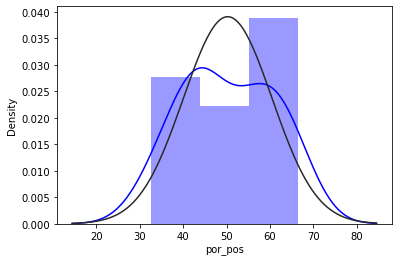

In [517]:
sns.distplot(df['por_pos'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['por_pos']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.024635100585398022


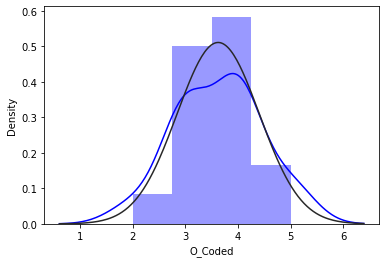

In [518]:
from scipy.stats import norm, skew

sns.distplot(df['O_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['O_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.8090398349558905


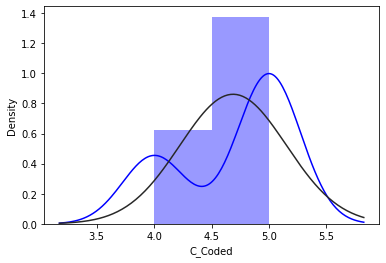

In [519]:
from scipy.stats import norm, skew

sns.distplot(df['C_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['C_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -1.359876613415705


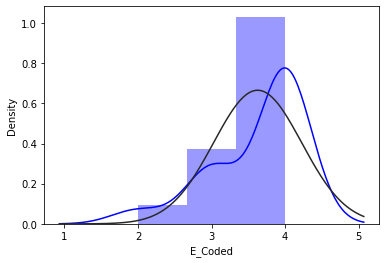

In [520]:
from scipy.stats import norm, skew

sns.distplot(df['E_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['E_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  0.0


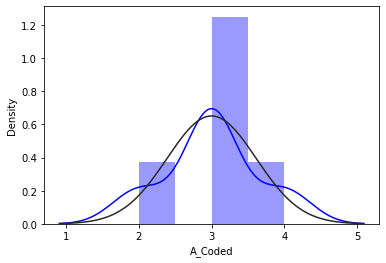

In [521]:
from scipy.stats import norm, skew

sns.distplot(df['A_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['A_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.35380019214382935


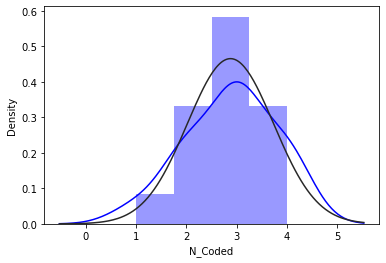

In [522]:
from scipy.stats import norm, skew

sns.distplot(df['N_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['N_Coded']))